In [1]:
#import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
#Reading the csv file
emp1=pd.read_csv("Unemployment_Rate_upto_11_2020[1].csv")

In [3]:
emp1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
emp1.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [5]:
emp1.columns=["State","Date","Frequency","Estimated Unemployment Rate(%)","Estimated Employed","Estimated Labour Participation Rate(%)","Region","Area","Category"]


In [6]:
numeric_columns = ["Estimated Unemployment Rate(%)", "Estimated Employed", "Estimated Labour Participation Rate(%)"]
numeric_data = emp1[numeric_columns]

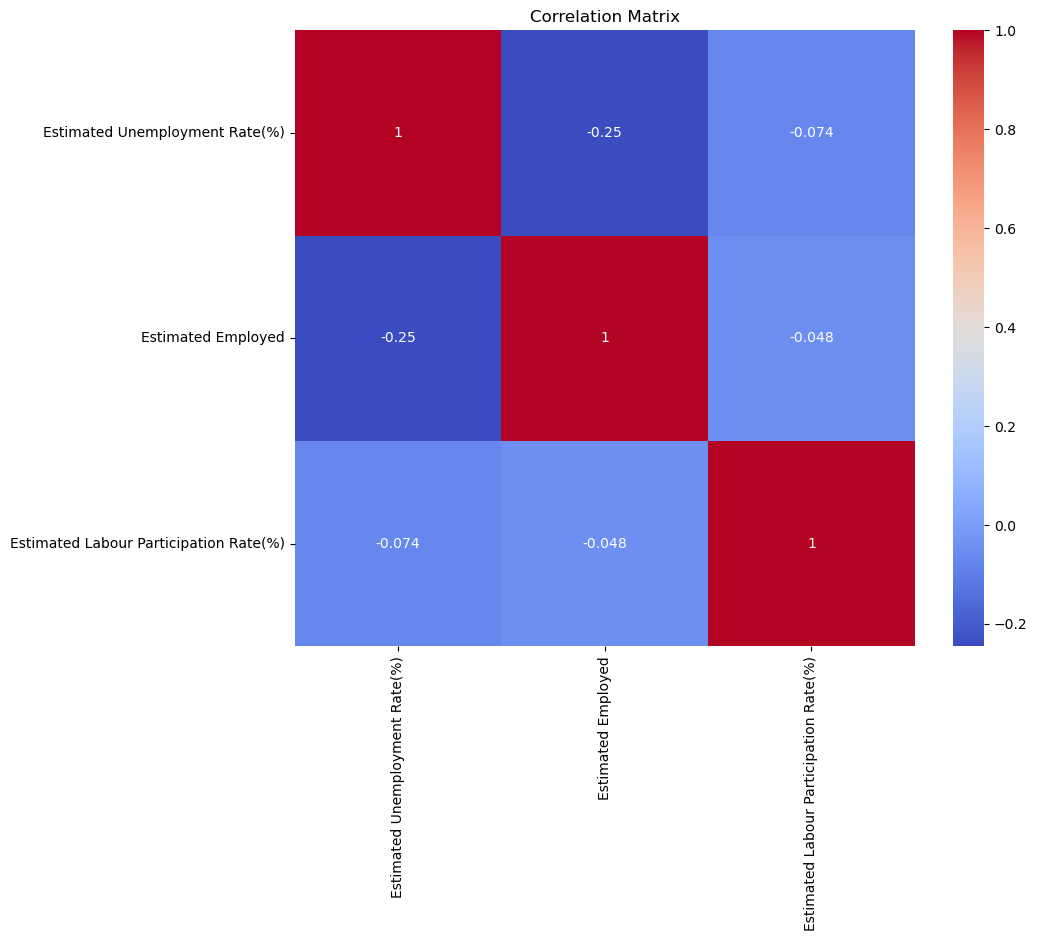

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

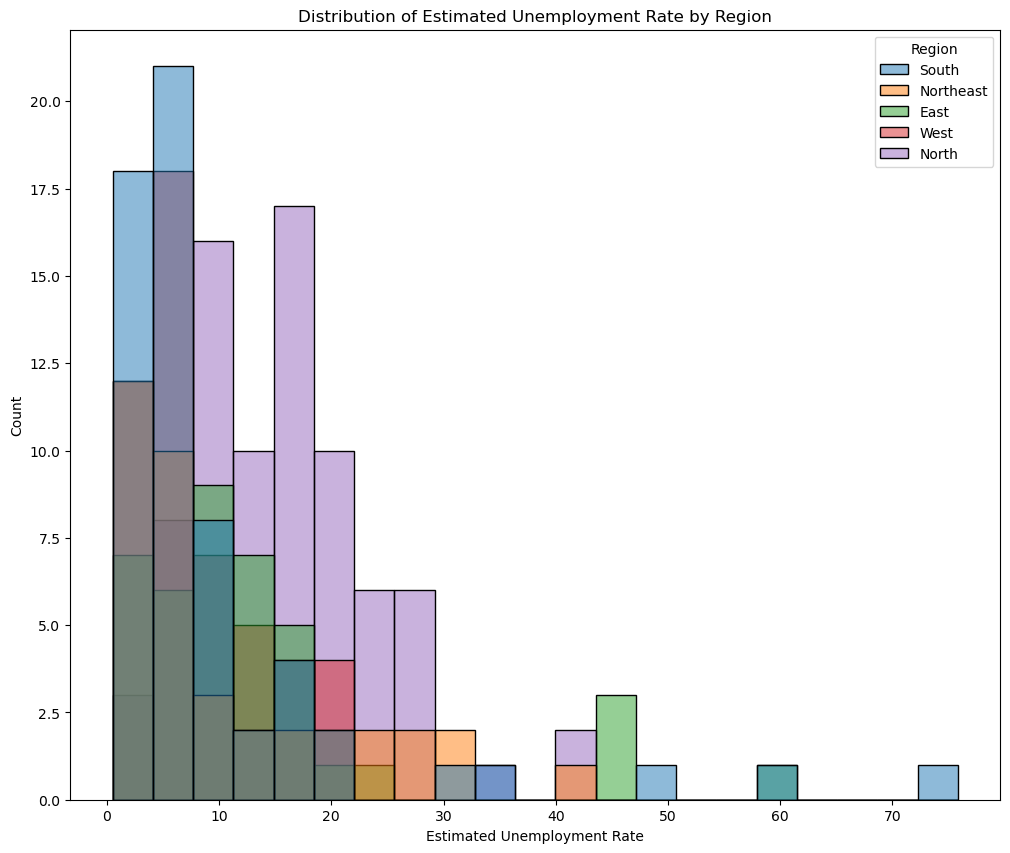

In [8]:
#Histogram of Estimated Unemployment Rate by Region
plt.figure(figsize=(12,10))
plt.title("Distribution of Estimated Unemployment Rate by Region")
sns.histplot(x="Estimated Unemployment Rate(%)",hue="Region",data=emp1)
plt.xlabel("Estimated Unemployment Rate")
plt.ylabel("Count")
plt.show()

In [10]:
#Aggregate data by Region and States
aggregated_data = emp1.groupby(["Region", "State"], as_index=False)["Estimated Unemployment Rate(%)"].mean()

In [12]:
fig = px.sunburst(aggregated_data, path=["Region", "State"], values="Estimated Unemployment Rate(%)",
                  color_continuous_scale="RdYlGn", title="Interactive Piechart Unemployment Rate in India")
fig.show()